In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [2]:
# This is Pytorch tutorial about tensorboard.
# In this article
# - Read data with appopriate transforms
# - Set up TensorBoard
# - Write to TensorBoard
# - Inspect the model architecture using TensorBoard
# - Use TensorBoard to create interactive versions of the visualizations 

In [41]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]
)

In [42]:
trainset = torchvision.datasets.FashionMNIST(
    "./datasets/FashionMNIST/train",
    download=True,
    train=True,
    transform=transform
)
testset = torchvision.datasets.FashionMNIST(
    ".datasets/FashionMNIST/test",
    download=True,
    train=False,
    transform=transform
)

In [43]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [48]:
def imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5
    np_img = img.numpy()
    if one_channel:
        plt.imshow(np_img, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [56]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [57]:
criterion = nn.CrossEntropyLoss() # for loss func
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [58]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

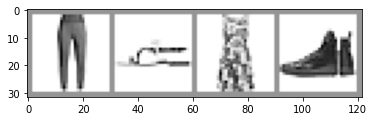

In [59]:
# TensorBoard

# get random images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# create grid
img_grid = torchvision.utils.make_grid(images)

# show images
imshow(img_grid, one_channel=True)

# to TensorBoard
writer.add_image("for_fashion_mnist_images", img_grid)
writer.add_graph(net, images)
writer.close()

In [71]:
def select_n_random(data, labels, n=100):
    assert len(data) == len(labels)
    
    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

images, labels = select_n_random(trainset.data, trainset.targets)

class_labels = [classes[lab] for lab in labels] # for pairing dataset and classes

features = images.view(-1, 28 * 28)
writer.add_embedding(features, metadata=class_labels, label_img=images.unsqueeze(1))
writer.close()